In [1]:
#general analysis packages
import numpy as np
#directory management
import os
#plotting packages
import matplotlib.pyplot as plt
import plotly.express as px
#image reading
import tifffile as tf
from util import pil_imread
#import custom functions
from pre_processing import *

In [58]:
def imshow(data):
    u = np.mean(data)
    sd = np.std(data)
    plt.imshow(data,cmap='gray',vmin=u-(2*sd), vmax=u+(3*sd))

# Load image

In [63]:
gen_path ="/central/groups/CaiLab/personal/Michal/raw/2021-12-06_p4p5p7_Neuro4181_5_repeat_pool1/notebook_pyfiles/dapi_aligned"
tiff = tf.imread(gen_path + "/HybCycle_11/MMStack_Pos0.ome.tif")
#tiff = np.swapaxes(tiff,0,1)

gen_path = "/central/groups/CaiLab/personal/Michal/raw/2021-12-06_p4p5p7_Neuro4181_5_repeat_pool1/initial_background"
tiff_bkgrd = tf.imread(gen_path + "/MMStack_Pos0.ome.tif")
tiff_bkgrd = np.swapaxes(tiff_bkgrd,0,1)

In [66]:
tiff.shape

(4, 2048, 2048)

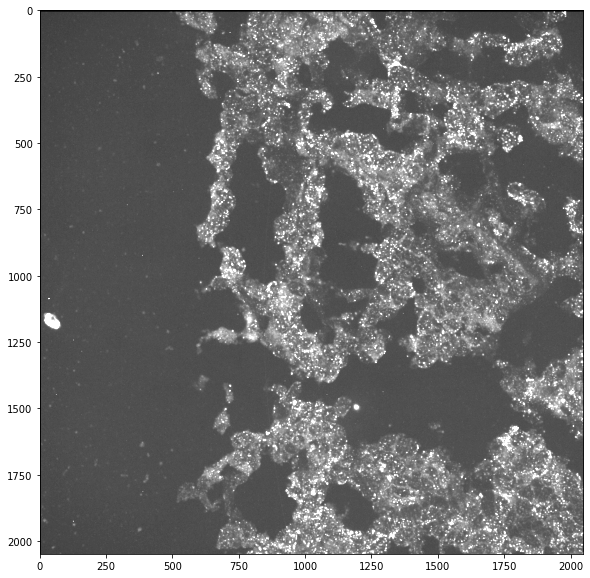

In [60]:
plt.figure(figsize=(10,10))
imshow(tiff[0])

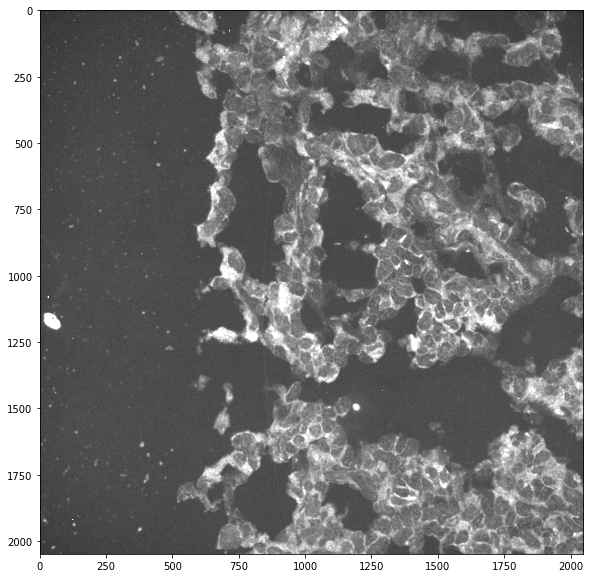

In [62]:
#check background
plt.figure(figsize=(10,10))
imshow(tiff_bkgrd.swapaxes(0,1)[0])

# Remove fiducials

In [ ]:
# adj_tiff = remove_fiducials(tiff_bkgrd, tiff, size=9,min_distance=10,threshold_abs=1000,
#                        num_peaks=3000, edge='return')

In [ ]:
# plot_2d_image(adj_tiff[1], zmax=3000)

# Background Correction

In [ ]:
# stack = raw image
# correction_algo = SigmaClipping_and_Gamma_C,Gaussian_and_Gamma_Correction, and LSR_Backgound_Correction
# stack_bkgrd = initial or final background image array
# z = number of z slices
# size = image size
# gamma = gamma enhancment values
# sigma = sigma value for gaussian blurring
# match_hist = bool to match histograms of blurred image
# subtract = bool to subtract blurred image from raw
# divide = bool to divide blurred image from raw

corrected = background_correct_image(stack = tiff, correction_algo = Gaussian_and_Gamma_Correction, 
                                     stack_bkgrd=None, z=2, 
                                     size=2048, gamma=1.0, sigma=20,match_hist =True, 
                                     subtract=True, divide=False)

In [ ]:
plot_2d_image(corrected[0], zmax=1500)

In [ ]:
plot_2d_image(corrected[0], zmax=1500)

In [ ]:
# corrected = background_correct_image(stack = tiff, correction_algo = Gaussian_and_Gamma_Correction,
#                                      stack_bkgrd=tiff_bkgrd, z=2, 
#                                      size=2048, gamma=1.4, sigma=40, match_hist =True, 
#                                      subtract=True, divide=False)

In [ ]:
#plot_2d_image(corrected[0], zmax=1000)

# RL Deconvolution

In [ ]:
# #good old Lucy
# #lb for leica boss and boc for box of chocolates
# rl_img_hpgb, psf = RL_deconvolution(corrected[:,:4,:,:], kern_rl=5, sigma=(1.8,1.6,1.5,1.3), 
#                    radius=(4,4,4,4), model="gaussian", microscope = "lb")

In [ ]:
# #deconvolved using a gaussian psf
# plot_2d_image(rl_img_hpgb[0], zmax=4000)

In [ ]:
# #good old Lucy
# #lb for leica boss and boc for box of chocolates
# rl_img_hpgb, psf = RL_deconvolution(corrected[:,:4,:,:], kern_rl=5, sigma=(1.8,1.6,1.5,1.3), 
#                    radius=(3,3,3,3), model="airy_disc", microscope = "lb")

In [ ]:
# #deconvolved using an airy disc psf
# plot_2d_image(rl_img_hpgb[0], zmax=1000)

In [ ]:
# #compare with non deconvolved
# plot_2d_image(corrected[0], zmax=800)

# Rolling Ball Subtraction

In [ ]:
#do you want to do rolling ball
rollingball = True
rb_radius = 5
corr_img = corrected 

#perform rolling ball
if rollingball == True:
    img_stack = []
    for z in range(corr_img.shape[0]):
        c_stack = []
        for c in range(corr_img.shape[1]):
            background = restoration.rolling_ball(corr_img[z][c], radius=rb_radius)
            rb_img = corr_img[z][c]-background
            rb_img[rb_img<0]=0
            c_stack.append(rb_img)
        img_stack.append(c_stack)
    corr_img = np.array(img_stack)

In [ ]:
corr_img.shape

In [ ]:
plot_2d_image(corr_img[0], zmax=1500)

# Low Pass Gaussian

In [ ]:
#lpgf
img_lpgb = low_pass_gaussian(corr_img, kern = 3)

In [ ]:
plot_2d_image(img_lpgb[0], zmax=1500)

# Check sbatch

In [ ]:
#corrected
gen_path = "/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/notebook_pyfiles/pre_processed_images"
tiff = tf.imread(gen_path + "/HybCycle_0/MMStack_Pos1.ome.tif")

In [ ]:
tiff.shape

In [ ]:
plot_2d_image(tiff[0], zmax=800)